# My thought process and just walkthrough
### of doing some machine learning practice on a dataset using Decision Tree

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import warnings



import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')




In [5]:
from scipy.stats import normaltest

In [6]:
df = pd.read_csv("updated_pollution_dataset.csv")

df.head(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'PM2.5'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'Proximity_to_Industrial_Areas'}>,
        <Axes: title={'center': 'Population_Density'}>]], dtype=object)

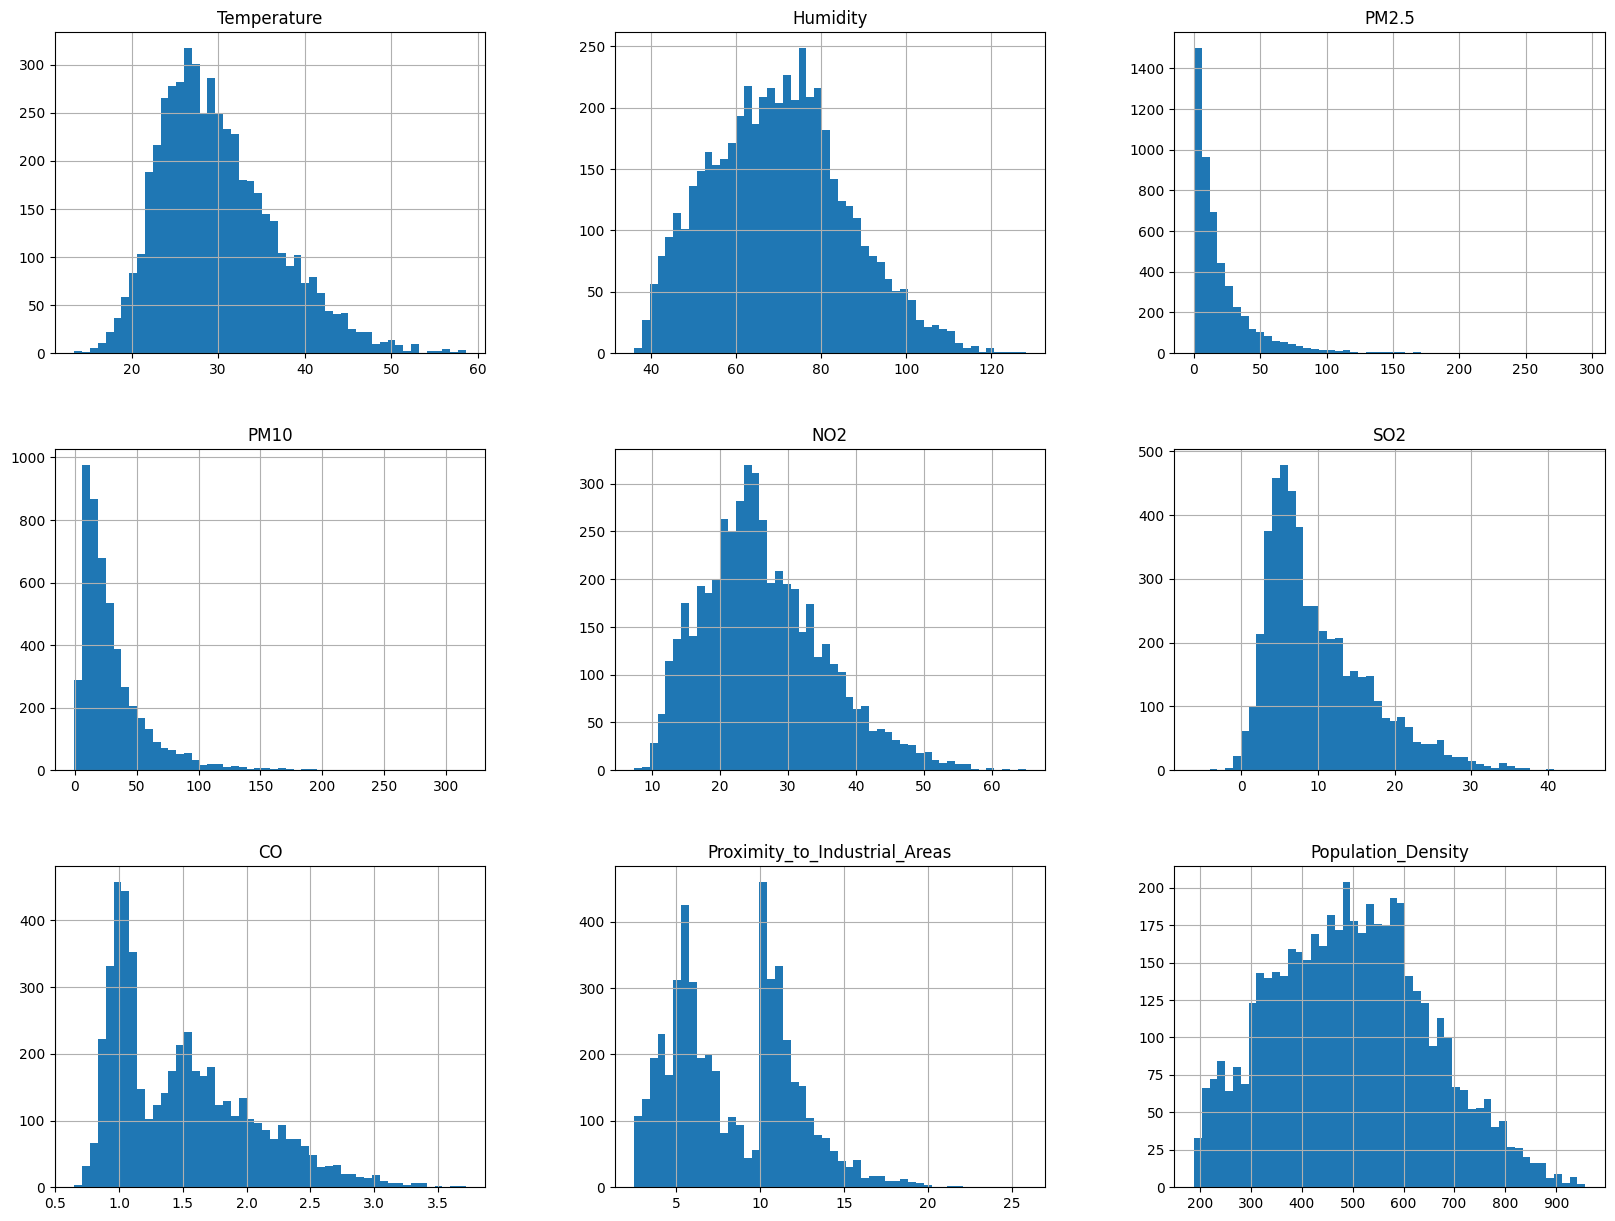

In [8]:
df.hist(bins=50, figsize=(20,15))

<Axes: >

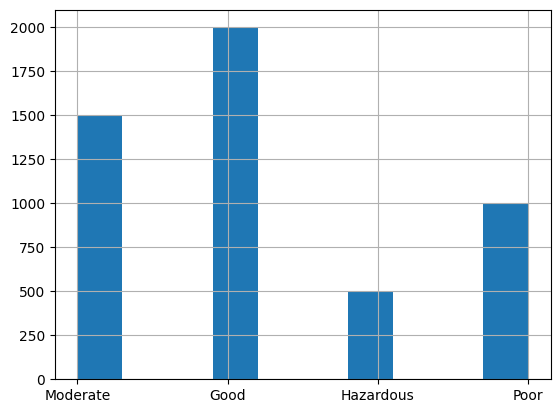

In [9]:
df['Air Quality'].hist()

### Encode the target variable for classification in the future
### on our machine learning model

In [10]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()

df_encoded['Air Quality'] = le.fit_transform(df_encoded['Air Quality'])

df_encoded.head(8)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,1
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,3
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,2


### Split our dataset for training and testing/holdout

In [11]:
X = df_encoded.iloc[:, 0:9]
X

y = df_encoded.iloc[:, 9]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 9), (1500, 9), (3500,), (1500,))

# Check for normality

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'PM2.5'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'Proximity_to_Industrial_Areas'}>,
        <Axes: title={'center': 'Population_Density'}>]], dtype=object)

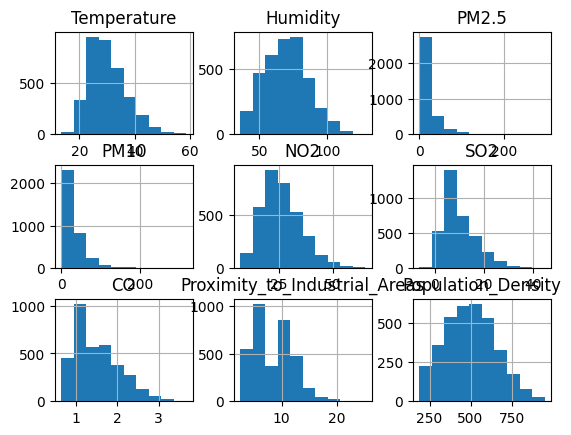

In [13]:
normaltest(X_train)

X_train.hist()

# Scale the data on X_train and X_test

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Ok Everything from the previous code cell and above is called PREPROCESSING. 

<h3>Now I'll go into actual training of the data and machine evaluation</h3>

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=17, criterion='entropy')

dt.fit(X_train_scaled, y_train)


dt_tree_predictions = dt.predict(X_test_scaled)

accuracy_score(y_test, dt_tree_predictions)

#As we can see, the accuracy of the model is 0.930666 which is pretty high/good.
#If we play around with some of the hyperparameters (max_depth), we can see it fluctuate between different values,
#and after trial and error I thing 8 as the max_depth gives the best accuracy, but nonetheless I'll continue with cross validation to see if it's the best value or if there's a better one.


0.9226666666666666

### Now lets do some parameter tuning on our model and see if we can do better/get better

In [22]:
from sklearn.model_selection import GridSearchCV

tree_params = { 'max_depth': range(1,20) }


best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17), tree_params, cv=5, n_jobs=-1)

best_tree.fit(X_train_scaled, y_train)

best_tree_v2 = GridSearchCV(estimator=dt, param_grid=tree_params, cv=5, n_jobs=-1)
best_tree_v2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=17),
             n_jobs=-1, param_grid={'max_depth': range(1, 20)})

In [26]:
print("Best hyperparameters/parameters ", best_tree.best_params_)
print("Best cross validation score ", best_tree.best_score_)
best_tree_v2.best_params_, best_tree_v2.best_score_


Best hyperparameters/parameters  {'max_depth': 11}
Best cross validation score  0.9231428571428572


({'max_depth': 11}, np.float64(0.9208571428571428))

### Looks like the model found that a max tree depth of 11 was best and got a resulting cross validation score
### of 0.923...

### Something interesting to note is that when I go back and plug in max_depth=11 into our model before crossvalidation and hyperparameter 
### tuning, I get a score of 0.93, so this is pretty interesting to me